# Using LSTM to preduct future price of NVDA

## Importing Packages

In [2]:
import pandas as pd
import tensorflow
import yfinance
from pandas_datareader import data as web
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import plotly.express as px


In [3]:
tickers = ['NVDA'] #NVDA
# Instantiate data frame container
asset_data = pd.DataFrame()
# For loop to get data from Yahoo finance
for ticker in tickers:
  # Each run of the loop returns a pandas data frame
  asset_data[ticker] = web.DataReader(
    name = ticker, 
    data_source = 'yahoo',
    start = '2022-06-01'
    # Use [ to extract values as pandas series
    )['Adj Close']
# Set column indices
#add dummy rows of date and 0 for the missing dates
asset_data = asset_data.append(pd.Series(name='2022-10-24 00:00:00'))
asset_data.iloc[-1] = 120
asset_data = asset_data.append(pd.Series(name='2022-10-25 00:00:00'))
asset_data.iloc[-1] = 120
asset_data = asset_data.append(pd.Series(name='2022-10-26 00:00:00'))
asset_data.iloc[-1] = 120
asset_data = asset_data.append(pd.Series(name='2022-10-27 00:00:00'))
asset_data.iloc[-1] = 120
asset_data = asset_data.append(pd.Series(name='2022-10-28 00:00:00'))
asset_data.iloc[-1] = 120
asset_data = asset_data.append(pd.Series(name='2022-10-29 00:00:00'))
asset_data.iloc[-1] = 120
asset_data = asset_data.append(pd.Series(name='2022-10-30 00:00:00'))
asset_data.iloc[-1] = 120
asset_data = asset_data.append(pd.Series(name='2022-10-31 00:00:00'))
asset_data.iloc[-1] = 120
asset_data = asset_data.append(pd.Series(name='2022-11-01 00:00:00'))
asset_data.iloc[-1] = 120
asset_data = asset_data.append(pd.Series(name='2022-11-02 00:00:00'))
asset_data.iloc[-1] = 120
asset_data = asset_data.append(pd.Series(name='2022-11-03 00:00:00'))
asset_data.iloc[-1] = 120
asset_data = asset_data.append(pd.Series(name='2022-11-04 00:00:00'))
asset_data.iloc[-1] = 120


asset_data.columns = tickers

/var/folders/wx/97hhflzd4fz_lhsgvwz6ztc40000gn/T/ipykernel_16546/1562865526.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  asset_data = asset_data.append(pd.Series(name='2022-10-24 00:00:00'))
/var/folders/wx/97hhflzd4fz_lhsgvwz6ztc40000gn/T/ipykernel_16546/1562865526.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  asset_data = asset_data.append(pd.Series(name='2022-10-24 00:00:00'))
/var/folders/wx/97hhflzd4fz_lhsgvwz6ztc40000gn/T/ipykernel_16546/1562865526.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  asset_data = asset_data.append(pd.Series(name='2022-10-25 00:00:00'))
/var/folders/wx/97hhflzd4fz_lhsgvwz6ztc40000gn/T/ipykernel_16546/1562865526.py:1

In [4]:
asset_data.tail()

,NVDA
Date,
2022-10-31 00:00:00,120.0
2022-11-01 00:00:00,120.0
2022-11-02 00:00:00,120.0
2022-11-03 00:00:00,120.0
2022-11-04 00:00:00,120.0


## Visualizing stock price history

In [5]:
# visualizing historical price movements of NVDA using plotly
fig = px.line(asset_data, x=asset_data.index, y=asset_data['NVDA'], title='NVDA Stock Price')
fig.show()

/Users/jiajie/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/plotly/express/_core.py:1073: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  return pd.Series(x).reset_index(drop=True)


## Data Preprocessing

In [6]:
values = asset_data.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]



In [7]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [8]:

test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [9]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

2022-10-21 19:33:32.729278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-21 19:33:32.729382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3


2022-10-21 19:33:33.048798: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-21 19:33:33.697129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-21 19:33:33.875693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-21 19:33:33.985719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-21 19:33:34.105256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 3/30 [==>...........................] - ETA: 0s - loss: 0.0157 

2022-10-21 19:33:34.282000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 26ms/step - loss: 0.0168
Epoch 2/3
30/30 [==============================] - 1s 26ms/step - loss: 0.0154
Epoch 3/3
30/30 [==============================] - 1s 26ms/step - loss: 0.0096


In [11]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2022-10-21 19:33:37.081705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-21 19:33:37.155298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-21 19:33:37.263863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 542ms/step


5.772382562810725

/var/folders/wx/97hhflzd4fz_lhsgvwz6ztc40000gn/T/ipykernel_16546/1447010845.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



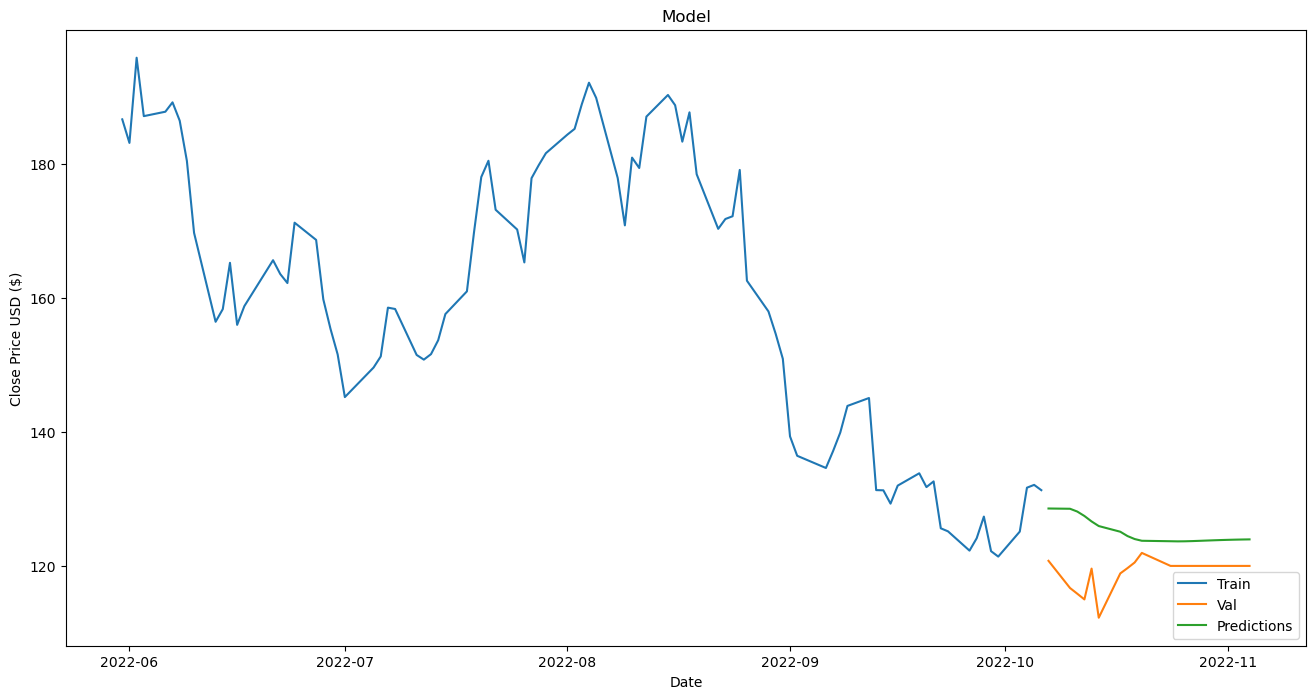

In [12]:

train = asset_data[:training_data_len]
validation = asset_data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['NVDA', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
plt.show()
#2nd column of validation


In [13]:
validation

,NVDA,Predictions
Date,,
2022-10-07 00:00:00,120.760002,128.565704
2022-10-10 00:00:00,116.699997,128.526489
2022-10-11 00:00:00,115.860001,128.113632
2022-10-12 00:00:00,115.000000,127.451515
2022-10-13 00:00:00,119.599998,126.635384
2022-10-14 00:00:00,112.269997,125.947044
2022-10-17 00:00:00,118.879997,125.099403
2022-10-18 00:00:00,119.669998,124.454788
2022-10-19 00:00:00,120.510002,124.009537


In [16]:
# get the last 10 rows of validation 
validation.tail(12).to_csv('YuenJiaJie_Impl_1.csv')